# Esdudando e explorando dados com NumPy

__Autoria:__ Sabrina Paes Leme P. Correa <br>
__Criação:__ 16/06/2024 <br>
__Modificação:__ 16/06/2024

__Dificuldade:__ Fácil <br>
__Descrição:__ Neste tutorial vamos mostrar algumas funcionalidades com o NumPy para trabalhar com as imagens
<br>
__Referências:__
* https://rasterio.readthedocs.io/en/latest/topics/plotting.html
* https://rasterio.readthedocs.io/en/latest/api/rasterio.plot.html
<br>
<br>


__Contato:__ <br>
📧 paeslemesa@gmail.com <br>
🔗 https://www.linkedin.com/in/paeslemesa/?locale=pt_BR <br>
🐱 https://github.com/paeslemesa

## Importando bibliotecas e Determinando nossa entrada de dados

In [14]:
from pathlib import Path #biblioteca de manipulação de arquivos

import numpy as np #biblioteca de manipulação de arrays
import rasterio as rio #biblioteca de manipulação de imagens
from rasterio.plot import show #biblioteca de plotagem de imagens

import matplotlib.pyplot as plt # biblioteca de plotagem de gráficos


from skimage.filters import threshold_otsu

Vamos trabalhar com uma imagem do sensor MSI/Sentinel-2

In [2]:
wkdir = "/home/jovyan/sabrina/ECURS/PapaNewGuinea_Landslide_20240530/SATELLITE_IMAGES"

img_path = Path( wkdir, "SENTINEL2_20240528T004709_20240528T004704_T54MYV.tif")

Essa imagem é uma imagem de um deslizamente de terra que aconteceu na Papua Nova Guiné em maio de 2024. Foram mais de 500m de deslizamento. E o nosso objetivo vai ser tentar separar informações de solo com floresta nesta imagem para detectar a área do desastre. <br>
Por mais que haja várias e várias ferramentas e até ferramentas super complexas, às vezes precisamos gerar dados de forma muito rápida para auxiliar na tomada de decisões de forma emerngencial. Esse seria um desses casos.

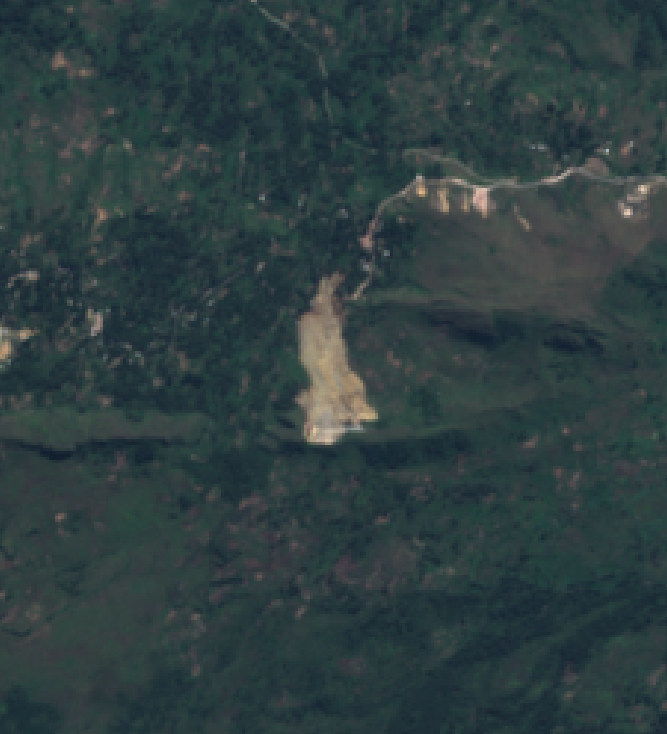

In [3]:
# Abrindo a imagem com o rasterio

with rio.open(img_path) as src:
    img_data = src.read()/10000 #dividindo por 10000 para normalizar os valores do Sentinel-2
    img_perfil = src.profile #pegando o perfil da imagem

Agora, para visualizarmos a imagem e o histograma, podemos criar os gráficos abaixo,

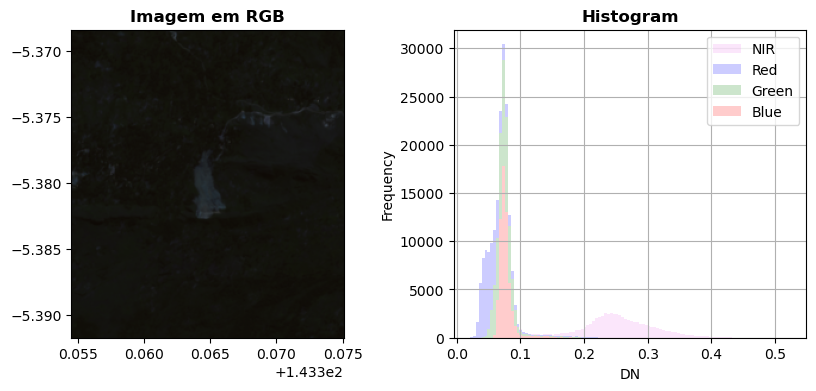

In [5]:
# Primeiro determinamos o que vamos plotar. Aqui determinamos duas imagens e o tamanho total vai ser de 10x4
fig, (axrgb, axhist) = plt.subplots(1, 2, figsize=(10,4)) 

# Ajustando primeiro plot
show(img_data[:3, :, :],   # plotando as bandas 0, 1 e 2
     transform=img_perfil['transform'], # pegando a transformação da imagem para a imagem ser plotada corretamente
     title="Imagem em RGB", # título do plot
     ax=axrgb) # plotando no eixo axrgb

rio.plot.show_hist(img_data, # determinando os dados para plotar o histograma
                   bins=110, # aqui nós escolhemos a quantidade de grupos que vamos dividir nossos dados para faciliat visialização. Quanto maior, mais perto da realidade
                   histtype='stepfilled', # tipo de plotagem do histograma
                   lw=0.2, # largura da linha
                   stacked=True, # se queremos os histogramas empilhados ou não
                   alpha=0.2, # transparência dos histogramas
                   ax=axhist, # plotando no eixo axhist
                   label = ['Blue', 'Green', 'Red', 'NIR']) # determinando os nomes das bandas

# Análise da imagem

Como estamos trabalhando com um local de vegetação e solo, a primeira coisa que eu faço é calcular o NDVI (_Normalized Differential Vegetation Index_) da imagem.

$NDVI = \frac{NIR-RED}{NIR+RED}$

In [6]:
ndvi = (img_data[3, :, :] - img_data[0, :, :]) / (img_data[3, :, :] + img_data[0, :, :]) # calculando o NDVI

Depois de calcular o NDVI, podemos analisar por imagem mesmo os valores de NDVI da nossa área de estudo.

Text(0.5, 1.0, 'NDVI')

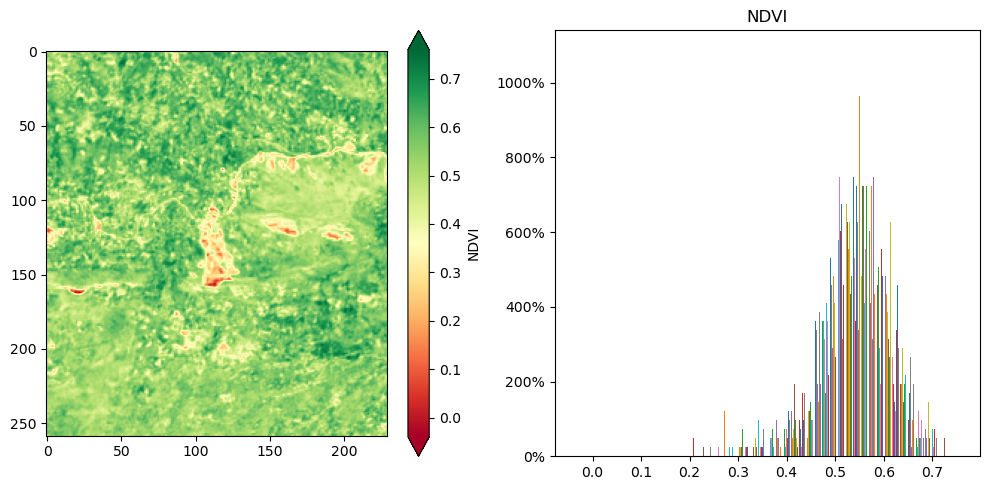

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10,5), tight_layout=True)
image = ax[0].imshow(ndvi, cmap='RdYlGn')

fig.colorbar(image, ax=ax[0], extend = 'both', label='NDVI', cmap='RdYlGn')

ax[1].hist(ndvi, bins=50, density = True)

plt.title('NDVI')


🧠 Agora, analisandoa imagem e o histograma, a gente consegue perceber que valores em torno de <code>NDVI = 0.35</code> são o que separam áreas de solo exposto (vermelho) e floresta (verde)

In [34]:
limiar = 0.35

binario = ndvi > limiar

Text(0.5, 1.0, 'NDVI binário')

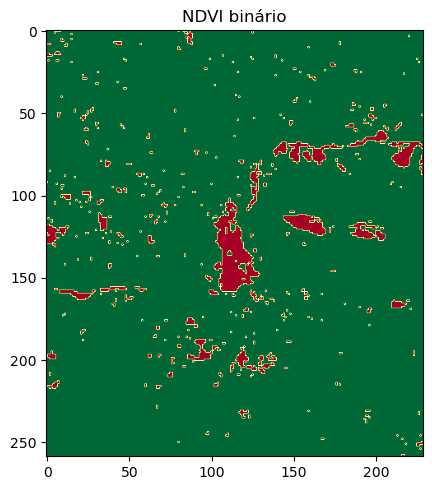

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10,5), tight_layout=True)
image = ax.imshow(binario, cmap='RdYlGn')

plt.title('NDVI binário')